# Visualize results of the first turn of French Présidentielles 2022 in Toulouse

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

### The following files can be downloaded on the French open data portal https://www.data.gouv.fr/

In [3]:
results_path = "presidentielle_2022_t1.csv"  # https://www.data.gouv.fr/fr/datasets/election-presidentielle-2022-1er-tour-resultats-ville-de-toulouse/
bureaux_path = "elections-2020-decoupage-bureaux-de-vote-toulouse.geojson"  # https://www.data.gouv.fr/fr/datasets/elections-2020-decoupage-des-bureaux-de-vote-toulouse/

In [4]:
df = pd.read_csv(results_path, sep=";")
df.head()

,sequence,type,annee,tour,departement,commune,numero_du_bureau,code_canton,code_circonscription,indicatif,...,sigle_du_candidat8,nombre_de_voix_du_candidat8,sigle_du_candidat9,nombre_de_voix_du_candidat9,sigle_du_candidat10,nombre_de_voix_du_candidat10,sigle_du_candidat11,nombre_de_voix_du_candidat11,sigle_du_candidat12,nombre_de_voix_du_candidat12
0,5,PR,2022,1,31,555,0004,17,4,I,...,HIDA,21,JADO,86,PECR,45,POUT,5,DUPO,3
1,14,PR,2022,1,31,555,0013,17,1,I,...,HIDA,18,JADO,44,PECR,34,POUT,7,DUPO,4
2,15,PR,2022,1,31,555,0014,17,1,I,...,HIDA,15,JADO,72,PECR,19,POUT,6,DUPO,9
3,17,PR,2022,1,31,555,0016,17,1,I,...,HIDA,27,JADO,65,PECR,47,POUT,5,DUPO,12
4,26,PR,2022,1,31,555,0025,17,2,I,...,HIDA,23,JADO,49,PECR,20,POUT,3,DUPO,8


### Determine top candidat for each polling station

In [5]:
bureau_top_map = {}
for l, row in df.iterrows():
    top_voix = 0
    for i in range(1, 13):
        if row["nombre_de_voix_du_candidat" + str(i)] > top_voix:
            bureau_top_map[row["numero_du_bureau"]] = row["sigle_du_candidat" + str(i)]
            top_voix = row["nombre_de_voix_du_candidat" + str(i)]

### Load geographical zones attached to each polling station

In [6]:
gdf = gpd.read_file(bureaux_path)

In [7]:
gdf.head()

,bv2020,nom,uniq_bdv,adresse,geometry
0,50,ECOLE JEAN JAURES,0050,21 AVENUE FRIZAC,"POLYGON ((1.45309 43.58701, 1.45364 43.58626, ..."
1,16,ECOLE BAYARD,0016,60 RUE MATABIAU,"POLYGON ((1.44846 43.61237, 1.44827 43.61249, ..."
2,28,ECOLE PIERRE ET MARIE CURIE,0028,36 RUE DE LA JEUNESSE,"POLYGON ((1.44081 43.61659, 1.44099 43.61769, ..."
3,69,ECOLE RICARDIE 3,0069,56 AVENUE DE L URSS,"POLYGON ((1.45584 43.58576, 1.45588 43.58566, ..."
4,70,ECOLE ANDRE DASTE,0070,4 AVENUE DE LATTRE DE TASSIGNY,"POLYGON ((1.43068 43.57009, 1.43054 43.57053, ..."


In [8]:
gdf["top_candidat"] = gdf["uniq_bdv"].map(bureau_top_map)

### Attribute a color to each candidate

In [9]:
candidats = {
    "ARTH": "firebrick",
    "ROUS": "red",
    "MACR": "orange",
    "LASS": "gold",
    "LEPE": "darkblue",
    "ZEMM": "black",
    "MELE": "red",
    "HIDA": "fuchsia",
    "JADO": "green",
    "PECR": "blue",
    "POUT": "crimson",
    "DUPO": "cyan",
}

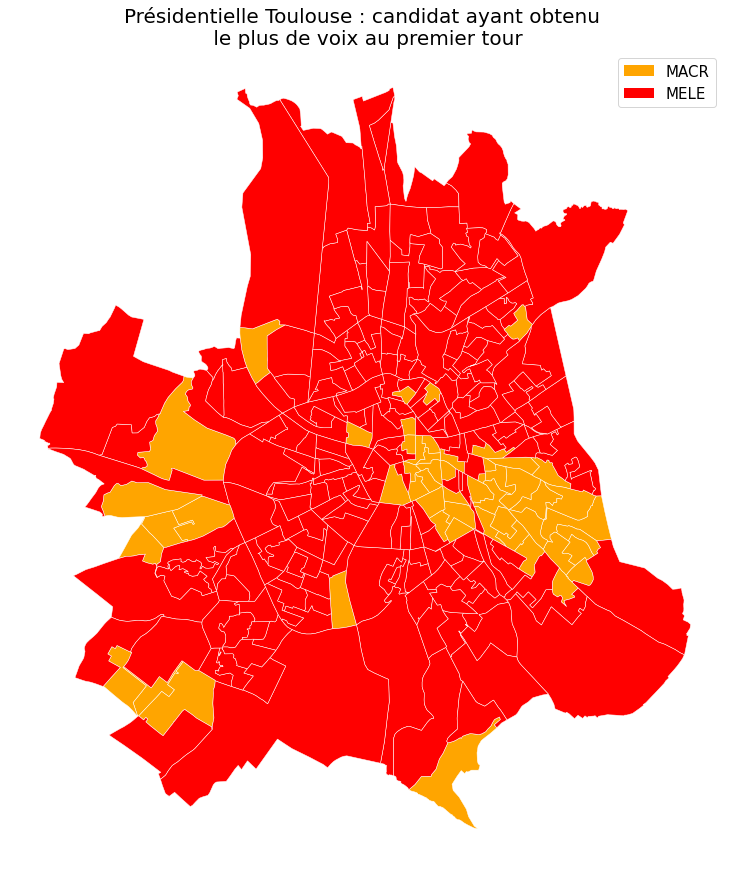

In [10]:
f, ax = plt.subplots(figsize=(15, 15))
pmarks = []

for candidate, color in candidats.items():
    sgdf = gdf.query("top_candidat == @candidate")
    if sgdf.shape[0] > 0:
        sgdf.query("top_candidat == @candidate").plot(
            ax=ax,
            color=color,
            categorical=True,
            legend=True,
            edgecolor="white",
            linewidth=0.5,
        )
        pmarks.append(Patch(facecolor=color, label=candidate))

handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=[*handles, *pmarks], loc="best", fontsize=15)
ax.set_title(
    "Présidentielle Toulouse : candidat ayant obtenu \n le plus de voix au premier tour",
    fontsize=20,
)
ax.set_axis_off()
plt.savefig("toulouse-2022-premier-tour.png", dpi=100, bbox_inches="tight")